# **Model Summary: Gradient Boosting Regressor**



| Step                  | Description                                                        |
| --------------------- | ------------------------------------------------------------------ |
| 📦 **Model**          | `GradientBoostingRegressor` from `sklearn.ensemble`                |
| 🎯 **Goal**           | Predict `Selling_Price` of a car                                   |
| ⚙️ **Type**           | Ensemble learning using **boosting** (sequential error correction) |
| 🌲 **Base Learner**   | Shallow Decision Trees (default: max\_depth=3)                     |
| 🧠 **Learning Style** | Each tree learns to correct the mistakes of the previous trees     |
| 🔢 **Key Parameters** | `n_estimators`, `learning_rate`, `max_depth`                       |
| 📉 **Loss Function**  | Mean Squared Error (default)                                       |
| 📊 **Output**         | Optimized ensemble model, feature importance, performance metrics  |

---


# **Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# **Step 2: Load and Inspect Dataset**

In [2]:
# Load dataset
df = pd.read_csv("car data.csv")

# Display info and first few rows
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **Step 3: Preprocessing – Drop Unwanted Columns, Encode Categoricals**

In [4]:
# Define categorical and numerical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Year', 'Present_Price', 'Kms_Driven', 'Owner']

# One-hot encode categorical variables (drop first to avoid dummy variable trap)
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Combine with numerical data
X = pd.concat([df[numerical_cols], df_encoded], axis=1)
y = df['Selling_Price']


# **Step 4: Train-Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **Step 5: Train the Gradient Boosting Regressor**

In [6]:
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

### 🔍 Parameter Breakdown:

| Parameter               | Meaning                                                                                                                                 |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **`n_estimators=100`**  | Number of boosting rounds (i.e., number of trees to be added sequentially). More trees → better fit (but slower & risk of overfitting). |
| **`learning_rate=0.1`** | Shrinks the contribution of each tree. Smaller value = slower learning but can lead to better generalization if `n_estimators` is high. |
| **`max_depth=3`**       | Depth of each individual decision tree. Lower depth = less complex tree, reduces overfitting.                                           |
| **`random_state=42`**   | Ensures reproducibility. Sets the random seed so that results are the same every time you run the code.                                 |

---

In short:
This model builds **100 shallow trees (depth 3)** one-by-one, each correcting the errors of the previous ones. The **learning rate** controls how much each tree contributes to the final prediction.


# **Step 6: Predictions & Evaluation**

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error:", mse)
print("📈 R² Score:", r2)


📉 Mean Squared Error: 0.7359857778133827
📈 R² Score: 0.9680500498190046


# **Step 7: Feature Importance Plot**

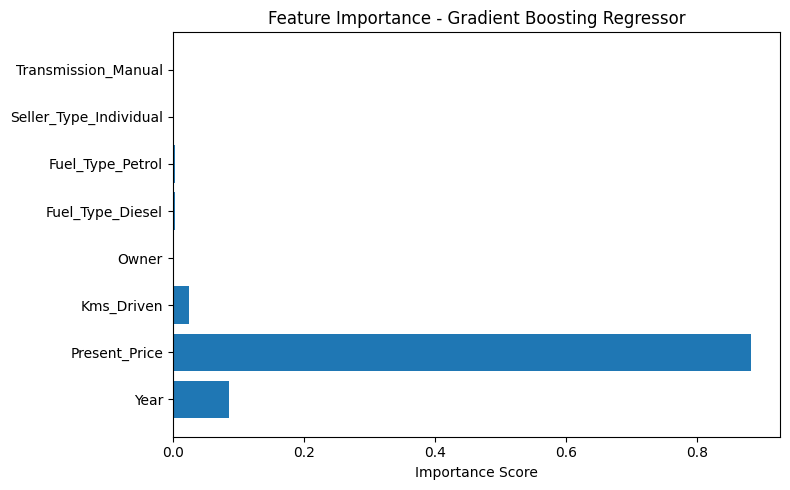

In [8]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Gradient Boosting Regressor")
plt.tight_layout()
plt.show()


# **GridSearchCV for Gradient Boosting Regressor**

## **Step 1: Import Required Tools**

In [11]:
from sklearn.model_selection import GridSearchCV


## **Step 2: Define the Parameter Grid**

In [12]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}


## **Step 3: Initialize the Model and GridSearchCV**

In [13]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)


## **Step 4: Fit Grid Search on Training Data**

In [14]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='r2', verbose=1)

## **Step 5: Get the Best Parameters and Score**

In [15]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on CV:", grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
Best R² Score on CV: 0.8976866232659585


## **Step 6: Evaluate on Test Set**

In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set MSE:", mse)
print("Test Set R² Score:", r2)


Test Set MSE: 1.1377706061188477
Test Set R² Score: 0.9506081295607379


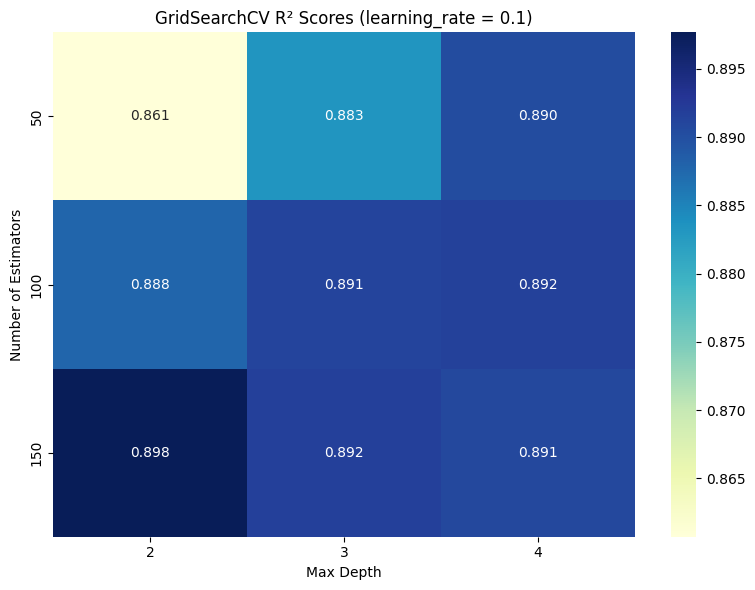

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table for heatmap
filtered = results_df[results_df['param_learning_rate'] == grid_search.best_params_['learning_rate']]

pivot_table = filtered.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title(f"GridSearchCV R² Scores (learning_rate = {grid_search.best_params_['learning_rate']})")
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.tight_layout()


The heatmap you generated gives a clear view of how **`n_estimators`** and **`max_depth`** affect model performance (R² score), while keeping `learning_rate = 0.1`.

---

### 🔍 Interpretation of the Heatmap:

| n\_estimators | max\_depth = 2 | max\_depth = 3 | max\_depth = 4 |
| ------------- | -------------- | -------------- | -------------- |
| **50**        | 0.861          | 0.883          | 0.890          |
| **100**       | 0.888          | 0.891          | 0.892 ✅        |
| **150**       | **0.898 ✅**    | 0.892          | 0.891          |

---

### ✅ Best Combination:

* **`n_estimators = 150`**
* **`max_depth = 2`**
* **`learning_rate = 0.1`**
* **R² = 0.898** (highest)

This means a **simpler tree (depth=2)** with **more boosting rounds** performs the best — likely avoiding overfitting while capturing sufficient detail.

---

Would you like:

* A markdown summary of your experiment?
* A final model using these best parameters for prediction and saving?
* Comparison with Random Forest and Decision Tree in one plot?



---

## 📝 Markdown Summary: Gradient Boosting Regressor with GridSearchCV

### 🔍 Objective:

To predict the **Selling Price** of used cars using ensemble learning with **Gradient Boosting Regressor**, and tune hyperparameters for best performance using `GridSearchCV`.

---

### 📦 Dataset:

* File: `car data.csv`
* Rows: 301
* Features Used:

  * **Numerical**: `Year`, `Present_Price`, `Kms_Driven`, `Owner`
  * **Categorical** (One-Hot Encoded): `Fuel_Type`, `Seller_Type`, `Transmission`

---

### 🔄 Preprocessing:

* Dropped: `Car_Name`
* Categorical features encoded using `pd.get_dummies(drop_first=True)`
* Train-Test Split: 80% training, 20% testing

---

### 🧪 Model:

**GradientBoostingRegressor** from `sklearn.ensemble`

### 🔍 Hyperparameter Tuning:

Used `GridSearchCV` with 5-fold cross-validation
**Search Space**:

```python
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}
```

---

### 📊 Best Parameters Found:

```python
n_estimators = 150
learning_rate = 0.1
max_depth = 2
```


## 🏗️ Final Model (Using Best Parameters)

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # for saving the model

# Best model with tuned parameters
final_model = GradientBoostingRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=2,
    random_state=42
)

# Train on full training data
final_model.fit(X_train, y_train)

# Predict on test data
y_pred = final_model.predict(X_test)

# Evaluation
print("Test Set MSE:", mean_squared_error(y_test, y_pred))
print("Test Set R² Score:", r2_score(y_test, y_pred))


Test Set MSE: 1.1377706061188477
Test Set R² Score: 0.9506081295607379


# ** Save the Final Model**

In [22]:
joblib.dump(final_model, "GradientBoostingCV_CarResalePrice.pkl")
print("Model saved successfully!")


Model saved successfully!
